### Introduction

## 1. Data Preprocessing

Imports

In [1]:
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from scipy.stats import skew

colors={'Çerçevelik': '#4a4aff', 'Ürgüp Sivrisi': '#ff5151'}

Functions

In [2]:
def plot_features(df, plot_type, **kwargs):
    colors = kwargs.get('colors', {'Çerçevelik': 'blue', 'Ürgüp Sivrisi': 'red'})
    size = kwargs.get('size', 4)
    jitter = kwargs.get('jitter', 0.5)
    kde = kwargs.get("kde", True)

    if plot_type == 'histogram':
        fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20,10))

        for i, col in enumerate(df.columns[df.columns != 'Class']):
            row_idx = i // 4
            col_idx = i % 4

            sns.histplot(data=df, x=col, hue='Class', ax=axs[row_idx, col_idx], alpha=0.7, bins=50, palette=colors,kde=kde, multiple='dodge')

            axs[row_idx, col_idx].legend(labels=['Çerçevelik', 'Ürgüp Sivrisi'])
            axs[row_idx, col_idx].set_title(col)
            axs[row_idx, col_idx].set_xlabel('Value')
            axs[row_idx, col_idx].set_ylabel('Frequency')
        
        fig.tight_layout()
        plt.show()

    elif plot_type == 'boxplot':
        fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20,12))

        for i, col in enumerate(df.columns[df.columns != 'Class']):
            row_idx = i // 4
            col_idx = i % 4

            sns.boxplot(x='Class', y=col, data=df, ax=axs[row_idx, col_idx], palette=colors)

            axs[row_idx, col_idx].set_title(col)
        
        fig.tight_layout()
        plt.show()

    elif plot_type == 'stripplot':
        fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20,15))

        for i, col in enumerate(df.columns[df.columns != 'Class']):
            row_idx = i // 4
            col_idx = i % 4

            sns.stripplot(x='Class', y=col, data=df, ax=axs[row_idx, col_idx],hue='Class', palette=colors,size=size,jitter=jitter)

            axs[row_idx, col_idx].set_title(col)

        fig.tight_layout()
        plt.show()

    else:
        print(f"Invalid plot type '{plot_type}', please choose 'histogram', 'stripplot', or 'boxplot'.")



Data Loading

In [3]:
mdf.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


Basic but important information about the data

In [4]:
shape =df.shape
columns = df.columns
print("Shape of the dataset: {}".format(df.shape))

Shape of the dataset: (2500, 13)


Understanding difficult-word coulmns
1. [Major and Minor axis](https://www.idseed.org/ckfinder/userfiles/images/LENGTH%20&%20WIDTH.png): In simpler terms, if you were to draw an ellipse aroun the seed, the 'Major_Axis_Length' would be the length of the longer axis of the ellipse. Vice versa to the 'Minor_Axis_Length' would be the length of the shorter axis of the ellipse.
2. Equivalent diameter: imagining the seed is stretched to be a circle then mesuring it's diameter.
3. Eccentricity: how much the seed has a thin line, if the seed is perfectly circular then the eccentricity value will be zero, if it is a long thin line, the value will be close to one.
4. Extent: how much the seed closely resembles a pumpkin seed. A higher value indicates that the seed is more similar in shape to a pumpkin while lower values indicate that the seed is less similar shape.
5. Compactness: amount of space needed to enclose the seed.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


No nulls in our data, datatypes are suitable.

In [6]:
df.duplicated().sum()

0

No duplicates in our dataset

### Visualizations

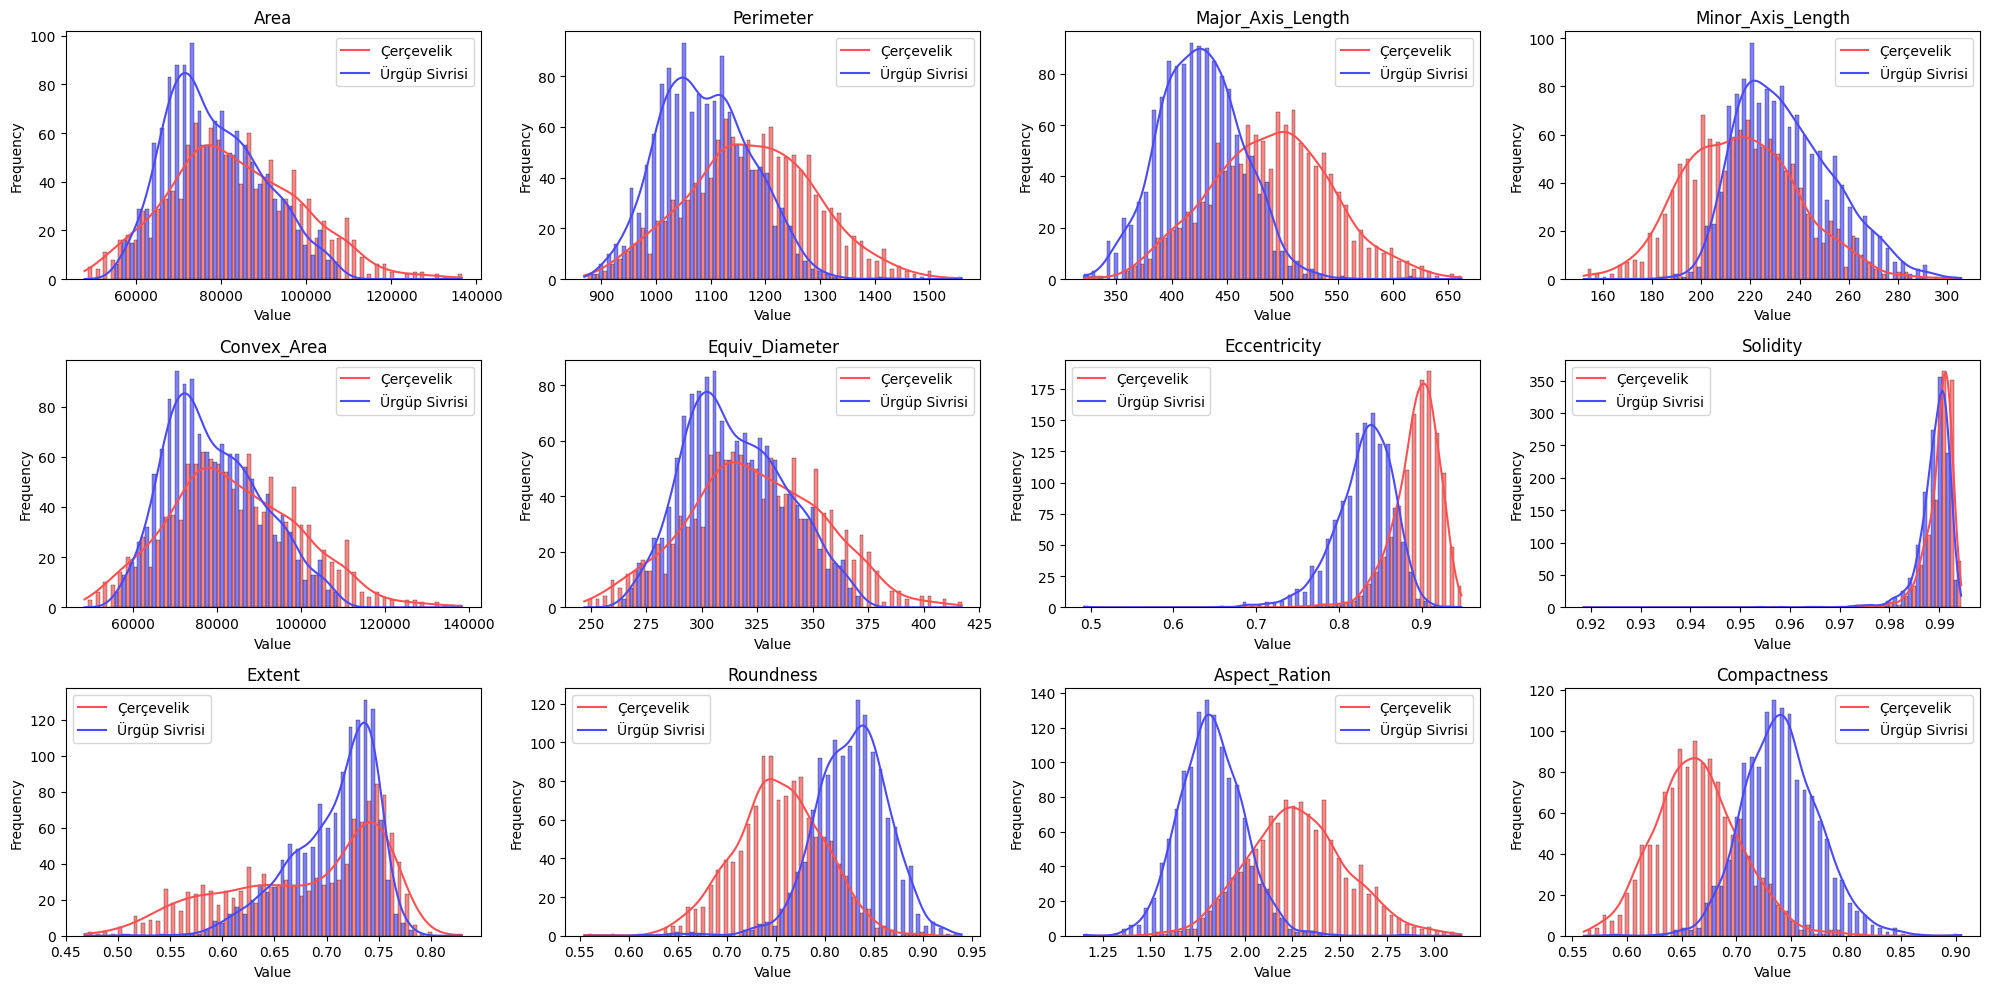

In [7]:
plot_features(df, plot_type='histogram', colors=colors)

<a id="conclusions"></a>
**We can conclude insights here**

The features Area, Perimeter, Major Axis Length, Convex Area, Equiv Diameter, Eccentricity, and Aspect Ratio all have higher values for the Ürgüp Sivrisi seeds, while these features are not as high for the Çerçevelik-type seeds.
Minor axis length is higher in Çerçevelik-type seeds compared to Ürgüp Sivrisi.
Roundness and Compactness are also higher in the Çerçevelik-type seeds.

Therefore, by examining these features we can distinguish between the two types of pumpkin seeds with a good degree of accuracy.



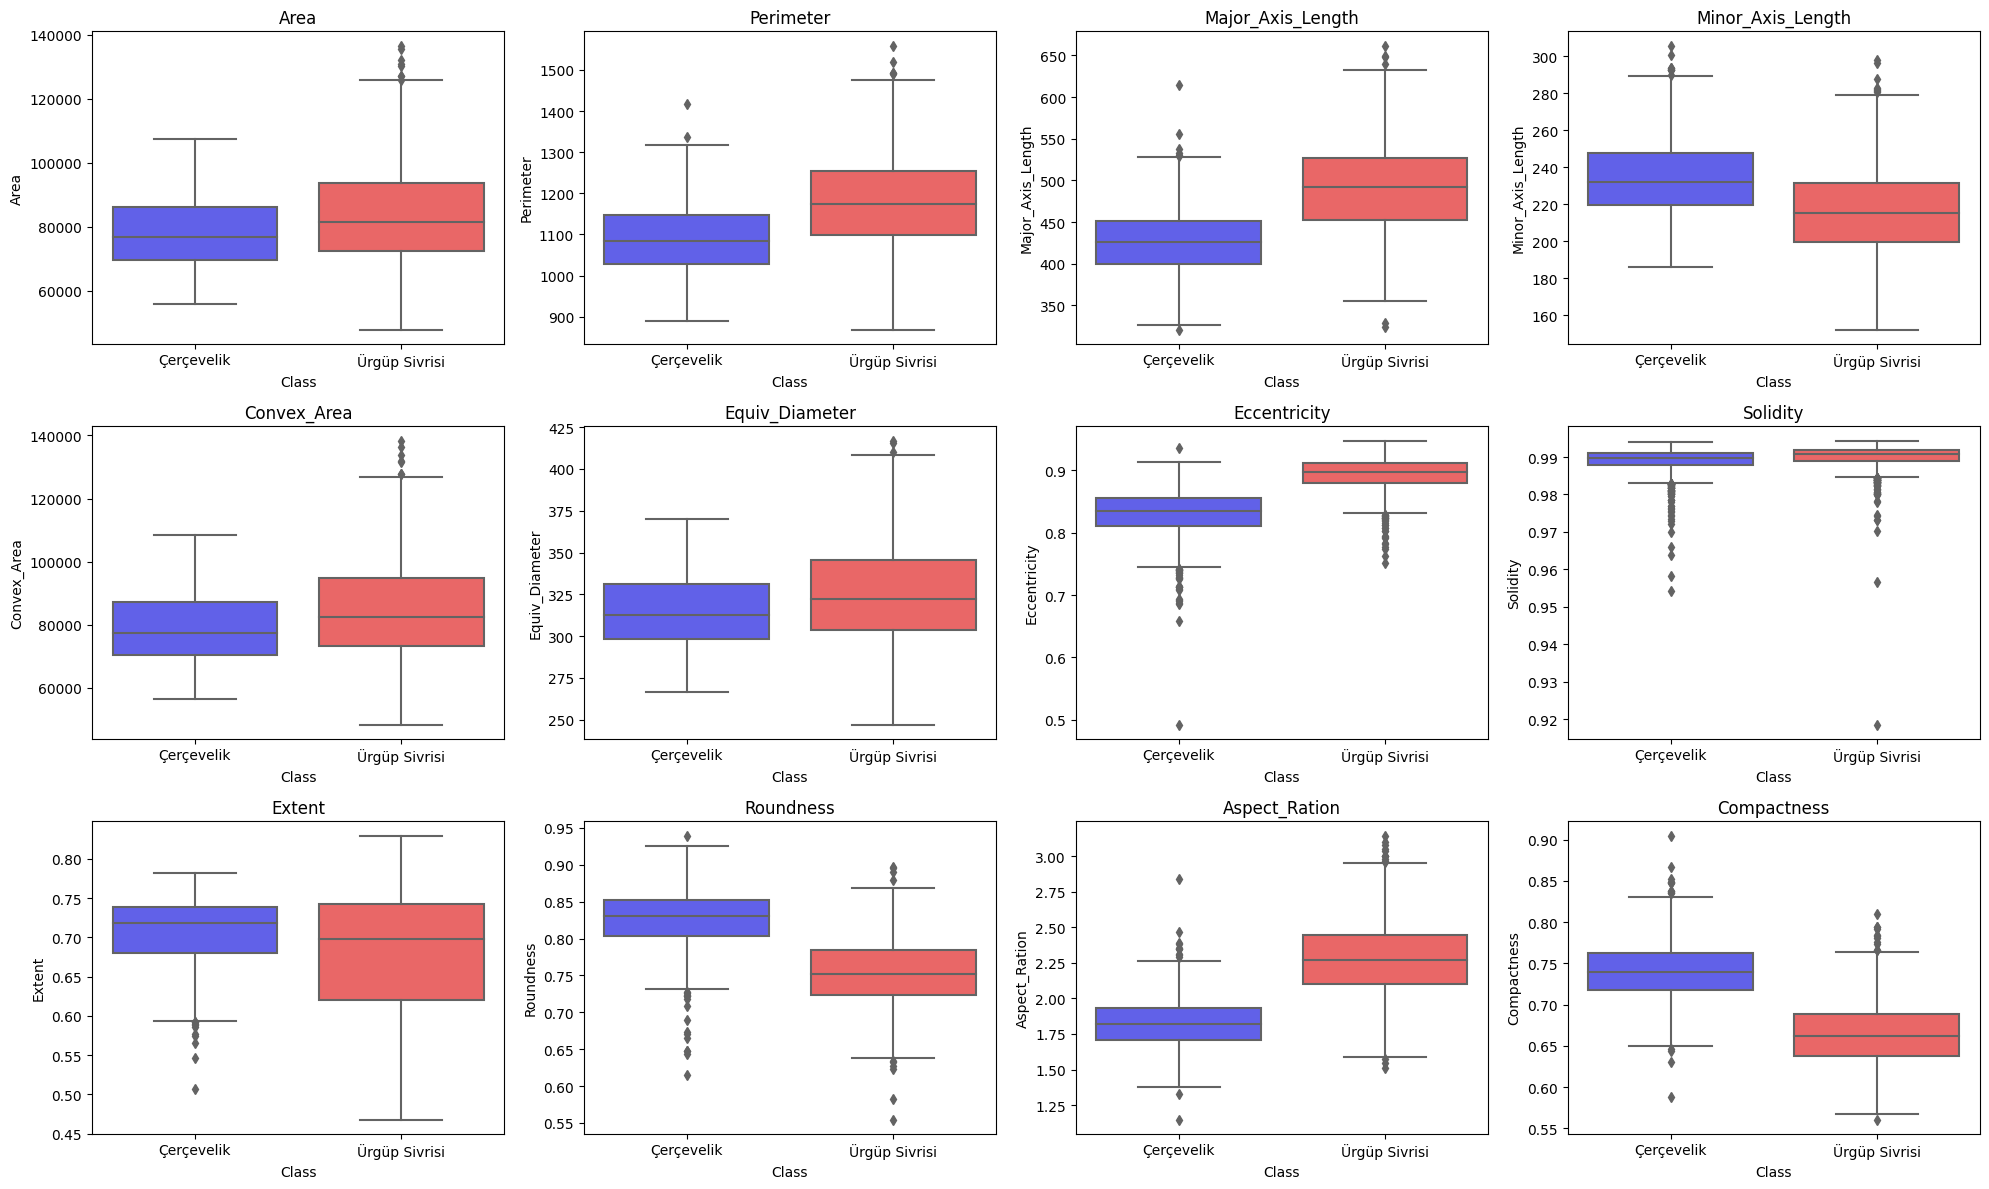

In [8]:
plot_features(df, plot_type='boxplot', colors=colors)

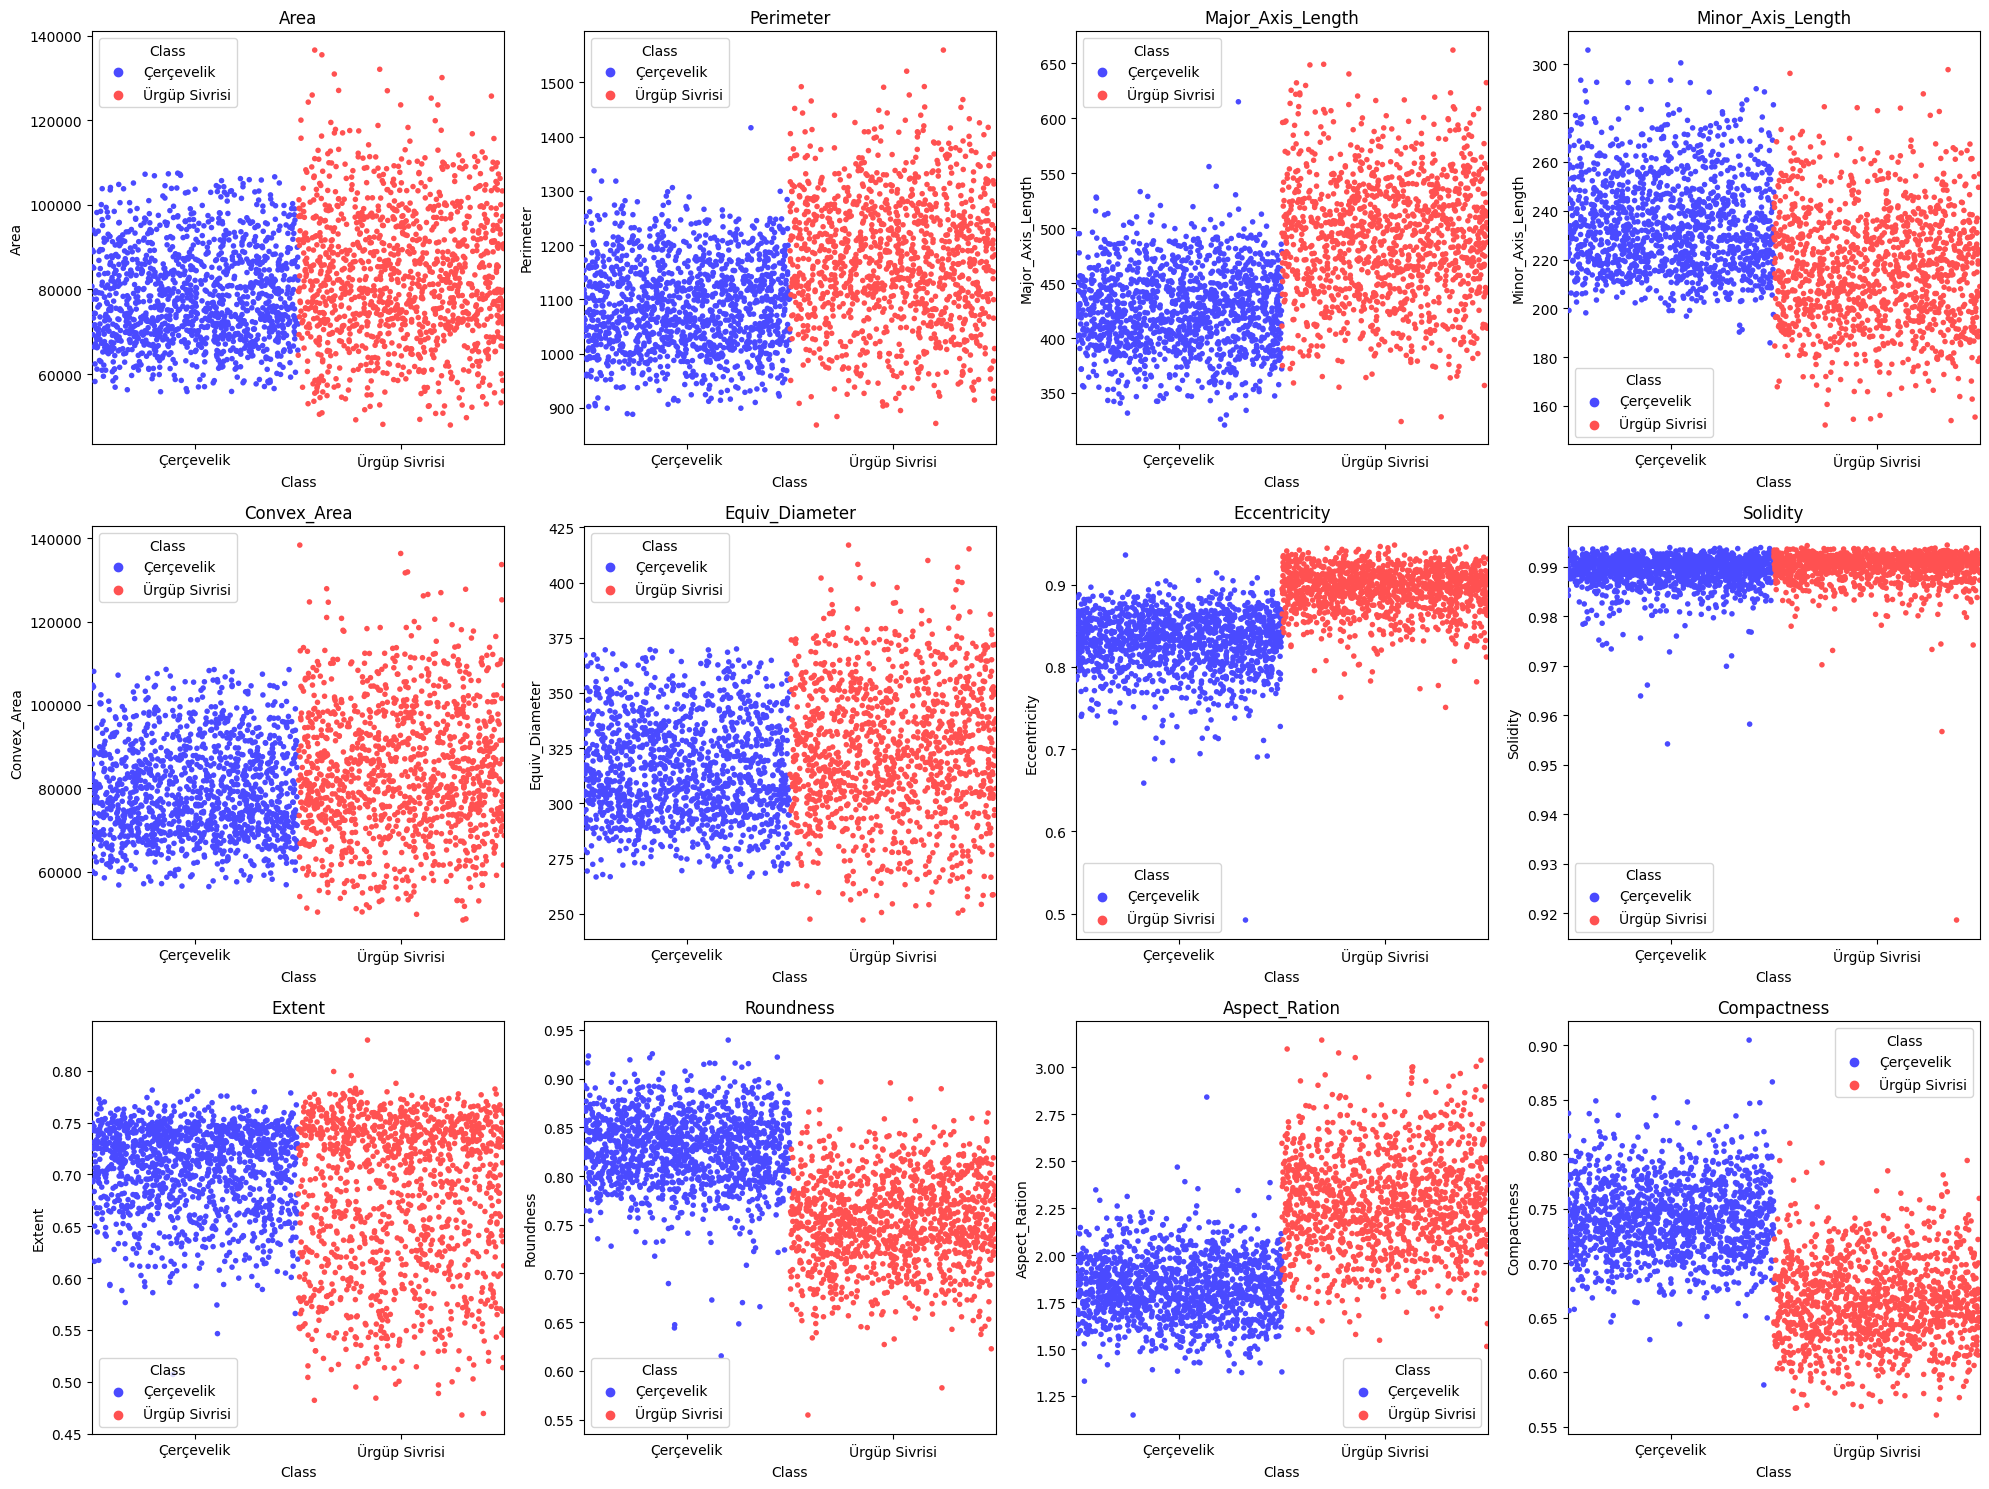

In [9]:
plot_features(df, plot_type='stripplot', size=4, jitter=0.5, colors=colors)

We can emphasize our [conclusions](#conclusions) from these plots above
* we also conclude that Ürgüp Sivrisi seeds are more ranged than Çerçevelik seeds in most cases like: Area, Perimeter, Axis length, etc. 

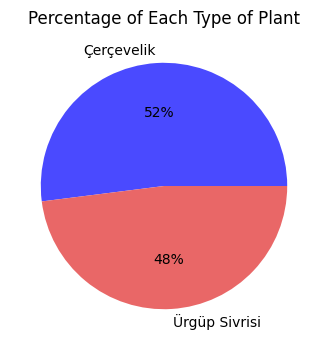

In [10]:

class_counts = df['Class'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.0f%%',colors=['#4a4aff','#e96767'])
plt.title('Percentage of Each Type of Plant')
plt.show()


In [11]:
Urgup_df = df[df['Class']=="Ürgüp Sivrisi"]
cercevelik_df = df[df['Class']=="Çerçevelik"]


In [12]:
# Numeric comparison between Ürgüp Sivrisi and Çerçevelik seeds.

urgup_stats = Urgup_df.describe()
cercevelik_stats = cercevelik_df.describe()

combined_stats = pd.concat([urgup_stats, cercevelik_stats], keys=['Ürgüp Sivrisi', 'Çerçevelik'])
combined_stats


Area    Perimeter  Major_Axis_Length  \
Ürgüp Sivrisi count    1200.000000  1200.000000        1200.000000   
              mean    83079.542500  1174.431919         489.458501   
              std     15519.323847   116.793253          54.904345   
              min     47939.000000   868.485000         324.011300   
              25%     72482.500000  1097.747250         451.870625   
              50%     81657.000000  1173.716500         491.518300   
              75%     93815.750000  1254.794000         526.521050   
              max    136574.000000  1559.450000         661.911300   
Çerçevelik    count    1300.000000  1300.000000        1300.000000   
              mean    78423.154615  1089.522488         426.272615   
              std     11246.499728    83.128407          37.196923   
              min     55811.000000   888.242000         320.844600   
              25%     69777.750000  1027.614000         399.972475   
              50%     76718.500000  1083.189500         425.426550   
              75%     86277.750000  1146.549250         451.430375   
              max    107476.000000  1416.303000         614.895900   

                     Minor_Axis_Length    Convex_Area  Equiv_Diameter  \
Ürgüp Sivrisi count        1200.000000    1200.000000     1200.000000   
              mean          216.064413   83914.813333      323.820202   
              std            23.173521   15624.711959       30.354631   
              min           152.171800   48366.000000      247.058400   
              25%           199.328900   73267.750000      303.788750   
              50%           215.294650   82446.500000      322.442100   
              75%           231.376300   94804.500000      345.615300   
              max           297.795200  138384.000000      417.002900   
Çerçevelik    count        1300.000000    1300.000000     1300.000000   
              mean          234.776929   79286.488462      315.193332   
              std            19.500795   11350.508104       22.472502   
              min           185.844000   56394.000000      266.572300   
              25%           219.773150   70522.000000      298.066750   
              50%           232.093600   77525.500000      312.539650   
              75%           247.596175   87213.500000      331.439650   
              max           305.818000  108536.000000      369.922600   

                     Eccentricity     Solidity       Extent    Roundness  \
Ürgüp Sivrisi count   1200.000000  1200.000000  1200.000000  1200.000000   
              mean       0.893749     0.989938     0.678240     0.752570   
              std        0.027247     0.003550     0.074216     0.045543   
              min        0.750700     0.918600     0.468000     0.554600   
              25%        0.879375     0.988900     0.620800     0.723875   
              50%        0.897650     0.990700     0.698000     0.752200   
              75%        0.912450     0.991800     0.742400     0.783800   
              max        0.948100     0.994400     0.829600     0.896700   
Çerçevelik    count   1300.000000  1300.000000  1300.000000  1300.000000   
              mean       0.830538     0.989080     0.707018     0.827499   
              std        0.036333     0.003391     0.040698     0.037485   
              min        0.492100     0.954200     0.507100     0.615300   
              25%        0.810775     0.987900     0.680550     0.803400   
              50%        0.835400     0.989800     0.718150     0.829900   
              75%        0.855625     0.991200     0.739200     0.852400   
              max        0.936000     0.993900     0.781400     0.939600   

                     Aspect_Ration  Compactness  
Ürgüp Sivrisi count    1200.000000  1200.000000  
              mean        2.279054     0.663991  
              std         0.262546     0.038586  
              min         1.513800     0.560800  
              25%         2.099950     0.637900  
    

In [13]:
df.groupby('Class').skew()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
Class,,,,,,,,,,,,
Çerçevelik,0.418354,0.213018,0.190791,0.574994,0.419941,0.280698,-1.361841,-3.176233,-0.922410,-0.648196,0.299341,0.241559
Ürgüp Sivrisi,0.310580,0.056191,0.058515,0.229002,0.310916,0.069773,-1.053895,-8.352404,-0.594304,-0.125832,0.201082,0.285848


In [14]:
# how much histograms are thin
df.groupby('Class').apply(pd.DataFrame.kurt)

C:\Users\Jonat\AppData\Local\Temp\ipykernel_4664\4275971221.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.groupby('Class').apply(pd.DataFrame.kurt)
C:\Users\Jonat\AppData\Local\Temp\ipykernel_4664\4275971221.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.groupby('Class').apply(pd.DataFrame.kurt)


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
Class,,,,,,,,,,,,
Çerçevelik,-0.521082,-0.366790,0.229110,-0.093053,-0.527158,-0.617802,6.650227,20.127332,0.52421,2.256317,1.220498,0.738563
Ürgüp Sivrisi,-0.130030,-0.240492,-0.177666,-0.028920,-0.127891,-0.280830,2.086161,143.726920,-0.77628,0.180593,0.049698,0.215050


# SVM